## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do klasyfikacji danych. Rozważane są dwa przykłady:  zestaw danych IRIS oraz zestaw danych TITANIC  (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

In [51]:
%matplotlib inline

import graphviz as gv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import cross_val_score

## 1. Pierwszy zestaw danych
Dane IRIS

In [52]:
# wczytanie zestawu danych
from sklearn import datasets
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris = data
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# rozbicie zestawu danych na dane opisujące kwiat (X) i etykietę klasy (y)
y = data['species']
X = data.drop('species', axis = 1)


# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

In [4]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf iris.dot -o iris.pdf

with open("iris.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

In [8]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

1.0

In [57]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe.

data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['species']
X = data_train.drop('species', axis = 1)

t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

print(t.score(X, y))

y = data_test['species']
X = data_test.drop('species', axis = 1)

print(t.score(X, y))

1.0
0.9811320754716981


## 2. Drugi zestaw danych
Dane TITANIC (do ściągnięcia z https://www.kaggle.com/c/titanic, dokładniej: potrzebny jest  plik https://www.kaggle.com/c/titanic/download/train.csv).

In [59]:
# wczytanie zestawu danych z pliku
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
# usunięcie z zestawu danych atrybutów nieistotnych dla klasyfikacji
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data = data.dropna()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [61]:
# zmiana kodowania atrybutów nominalnych w zestawie danych
data['Sex'] = pd.Categorical(data['Sex']).codes
data['Embarked'] = pd.Categorical(data['Embarked']).codes
data.head()

titanic = data

In [62]:
# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
y = data['Survived']
X = data.drop('Survived', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

In [10]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf titanic.dot -o titanic.pdf

with open("titanic.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

In [32]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

0.9859550561797753

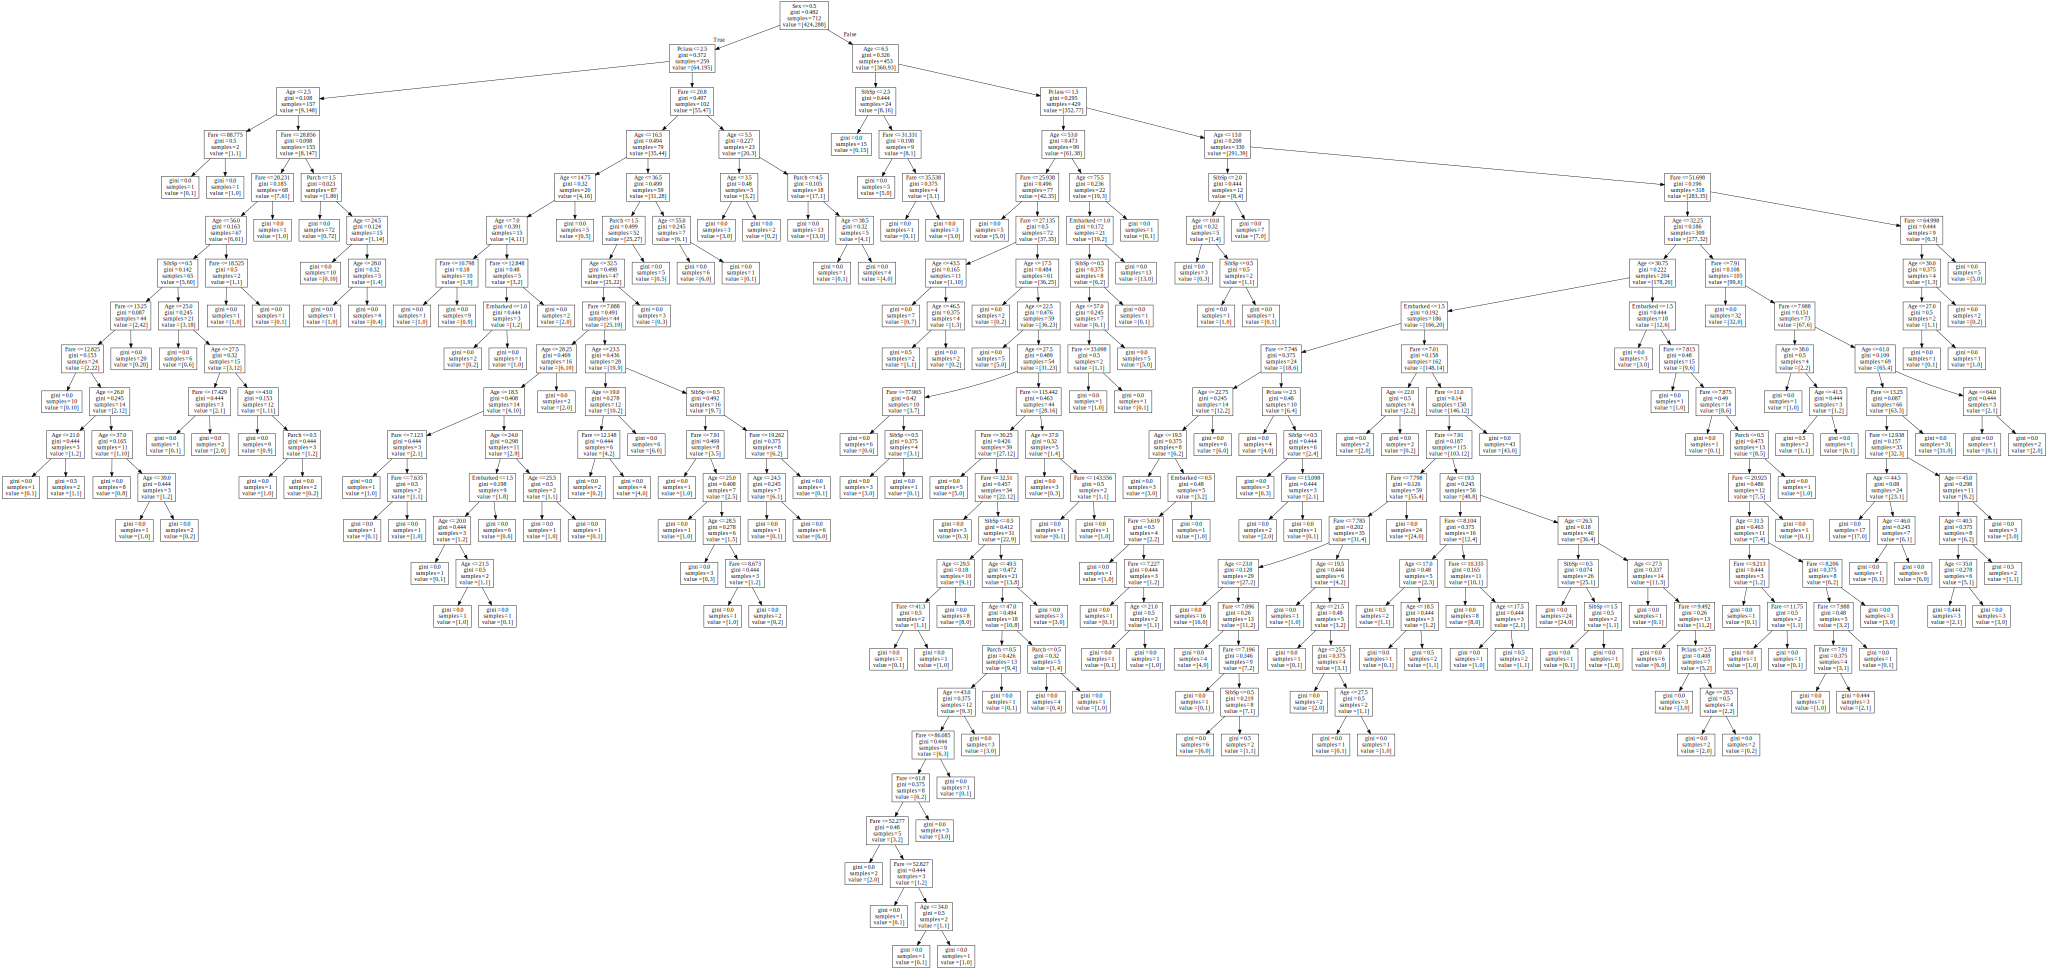

In [39]:
:]

In [47]:
t = tree.DecisionTreeClassifier(criterion='entropy')
t = t.fit(X, y)
t.score(X, y)

0.9859550561797753

In [65]:
cross_val_score(tree.DecisionTreeClassifier(), titanic_X, titanic_y, cv=10)

array([0.66666667, 0.72222222, 0.79166667, 0.84722222, 0.78873239,
       0.78873239, 0.83098592, 0.70422535, 0.77142857, 0.81428571])

In [66]:
cross_val_score(tree.DecisionTreeClassifier(criterion='entropy'), titanic_X, titanic_y, cv=10)

array([0.65277778, 0.70833333, 0.75      , 0.84722222, 0.78873239,
       0.77464789, 0.83098592, 0.74647887, 0.8       , 0.82857143])

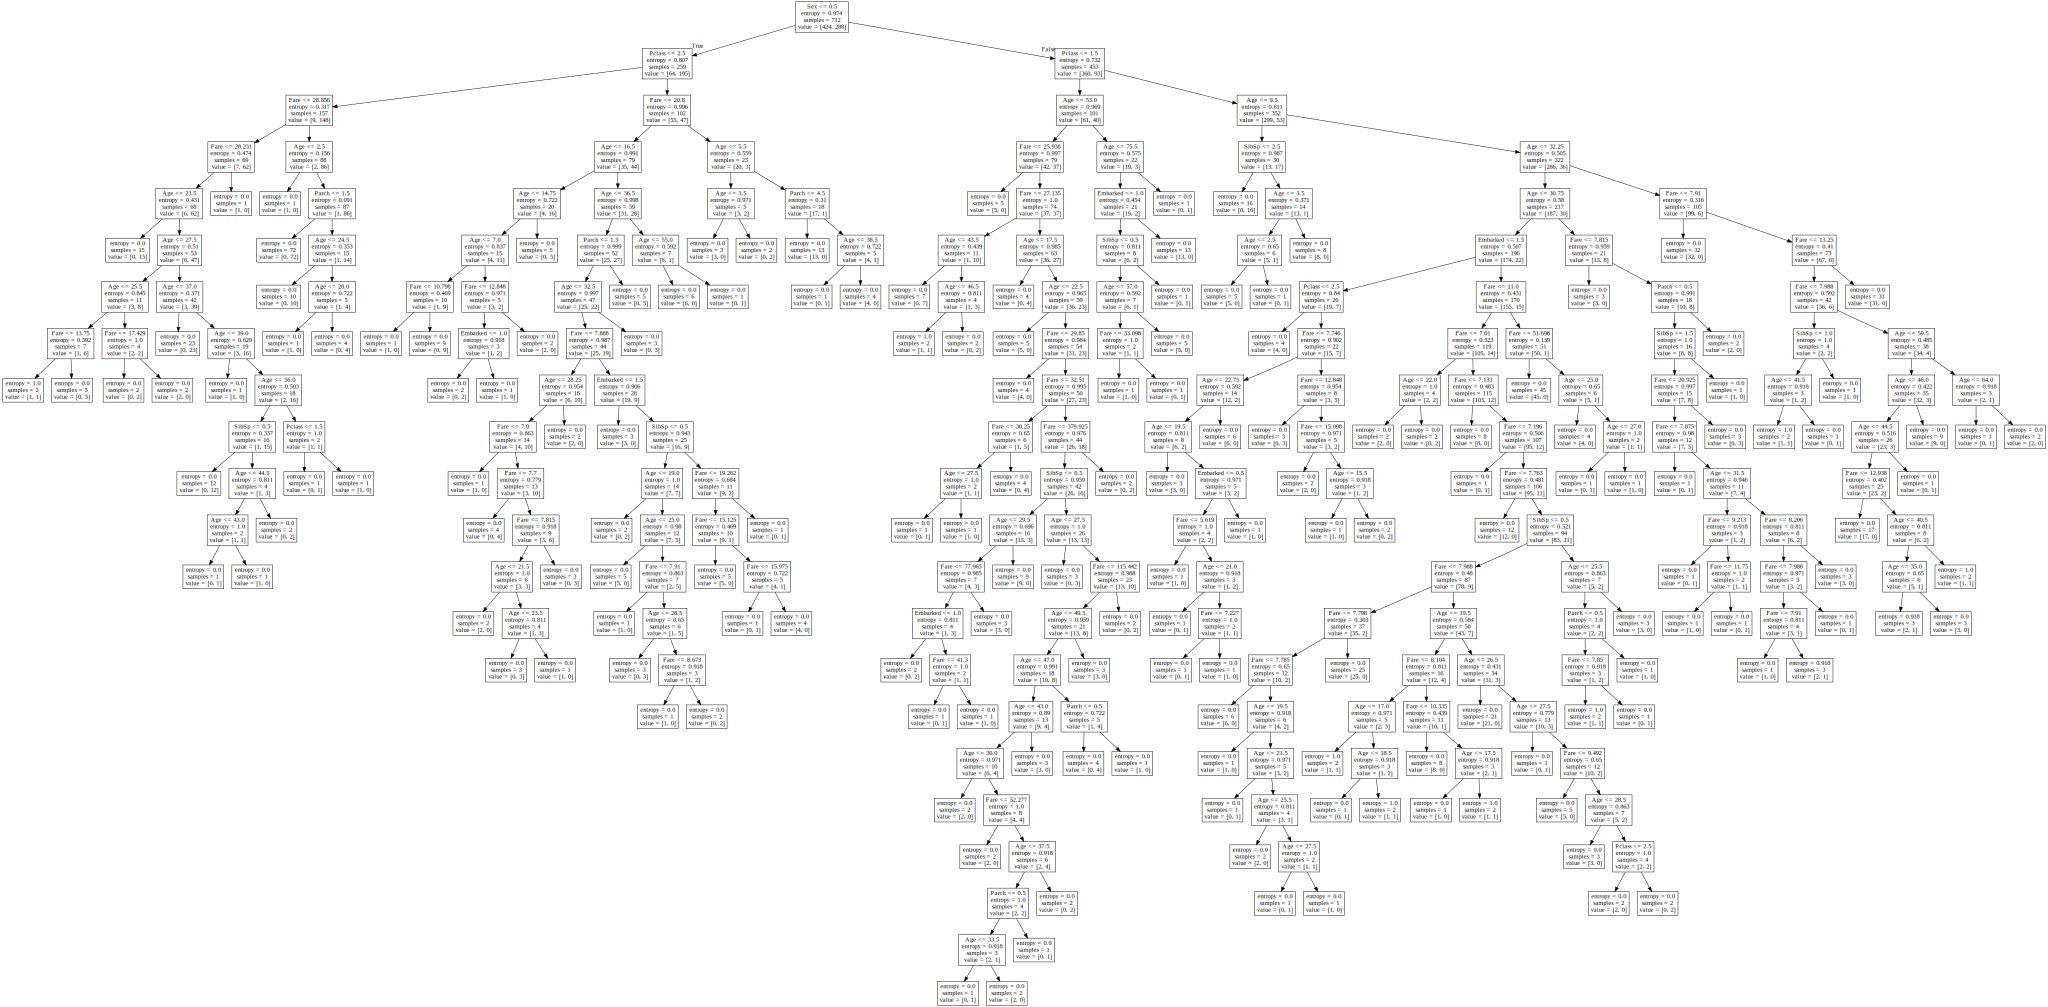

In [50]:
tree.export_graphviz(t, out_file='titanic-entropy.dot', feature_names=X.columns)
gv.Source(open('titanic-entropy.dot').read())

In [24]:
random_sampling = np.random.uniform(0, 1, len(iris))

iris_train = iris[random_sampling <= 0.66]
iris_test = iris[random_sampling > 0.66]

iris_train_y = iris_train['species']
iris_train_X = iris_train.drop('species', axis=1)

iris_test_y = iris_test['species']
iris_test_X = iris_test.drop('species', axis=1)

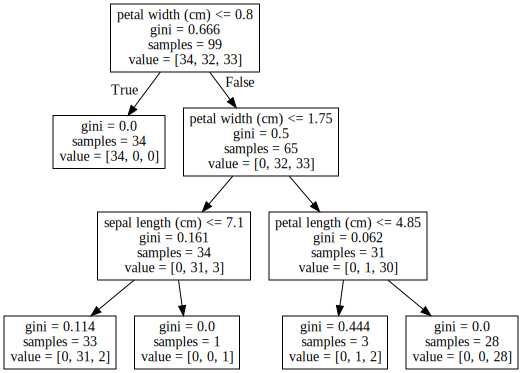

In [30]:
t = tree.DecisionTreeClassifier(max_depth=3)
t = t.fit(iris_train_X, iris_train_y)

tree.export_graphviz(t, out_file='iris-maxdepth.dot', feature_names=iris_train_X.columns)
gv.Source(open('iris-maxdepth.dot').read())

In [31]:
t.score(iris_train_X, iris_train_y)

0.9696969696969697

In [32]:
t.score(iris_test_X, iris_test_y)

0.9607843137254902

In [67]:
cross_val_score(tree.DecisionTreeClassifier(max_depth=3), titanic_X, titanic_y, cv=10)

array([0.80555556, 0.75      , 0.80555556, 0.76388889, 0.77464789,
       0.8028169 , 0.81690141, 0.76056338, 0.84285714, 0.8       ])

In [72]:
rf_iris = ensemble.RandomForestClassifier(n_estimators=100)
rf_iris = rf_iris.fit(iris_train_X, iris_train_y)

In [75]:
rf_iris.score(iris_train_X, iris_train_y)

1.0

In [76]:
rf_iris.score(iris_test_X, iris_test_y)

0.9807692307692307

In [34]:
random_sampling = np.random.uniform(0, 1, len(titanic))

titanic_train = titanic[random_sampling <= 0.66]
titanic_test = titanic[random_sampling > 0.66]

titanic_train_y = titanic_train['Survived']
titanic_train_X = titanic_train.drop('Survived', axis = 1)

titanic_test_y = titanic_test['Survived']
titanic_test_X = titanic_test.drop('Survived', axis = 1)

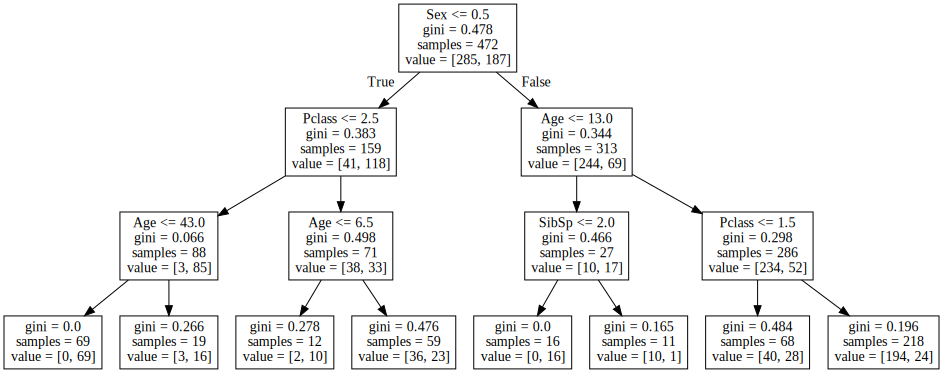

In [38]:
t = tree.DecisionTreeClassifier(max_depth=3)
t = t.fit(titanic_train_X, titanic_train_y)

tree.export_graphviz(t, out_file='titanic-maxdepth.dot', feature_names=titanic_train_X.columns)
gv.Source(open('titanic-maxdepth.dot').read())

In [40]:
t.score(titanic_train_X, titanic_train_y)

0.8283898305084746

In [41]:
t.score(titanic_test_X, titanic_test_y)

0.8208333333333333

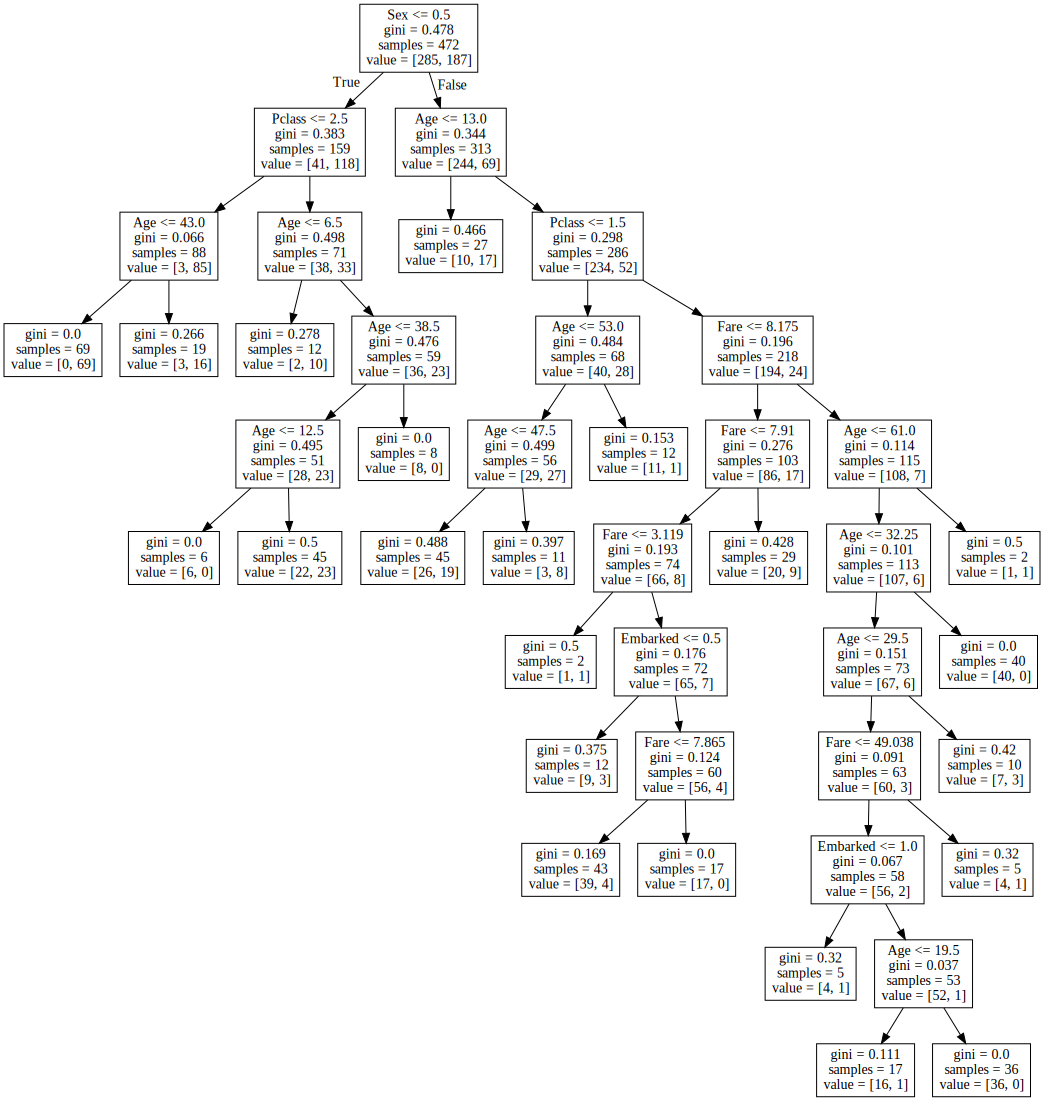

In [48]:
t = tree.DecisionTreeClassifier(min_samples_split=0.1)
t.fit(titanic_train_X, titanic_train_y)

tree.export_graphviz(t, out_file='titanic-minsamples.dot', feature_names=titanic_train_X.columns)
gv.Source(open('titanic-minsamples.dot').read())

In [49]:
t.score(titanic_train_X, titanic_train_y)

0.8220338983050848

In [50]:
t.score(titanic_test_X, titanic_test_y)

0.8

In [70]:
cross_val_score(tree.DecisionTreeClassifier(min_samples_split=0.1), titanic_X, titanic_y, cv=10)

array([0.63888889, 0.73611111, 0.72222222, 0.86111111, 0.76056338,
       0.77464789, 0.8028169 , 0.77464789, 0.84285714, 0.75714286])

In [103]:
rf_titanic = ensemble.RandomForestClassifier(n_estimators=100)
rf_titanic = rf_titanic.fit(titanic_train_X, titanic_train_y)

In [104]:
rf_titanic.score(titanic_train_X, titanic_train_y)

0.9892241379310345

In [105]:
rf_titanic.score(titanic_test_X, titanic_test_y)

0.8145161290322581

In [108]:
extra_iris = ensemble.ExtraTreesClassifier(n_estimators=100)
extra_iris = extra_iris.fit(iris_train_X, iris_train_y)

In [109]:
extra_iris.score(iris_train_X, iris_train_y)

1.0

In [111]:
extra_iris.score(iris_test_X, iris_test_y)

0.9807692307692307

In [117]:
extra_titanic = ensemble.ExtraTreesClassifier(n_estimators=100, criterion='entropy')
extra_titanic = extra_titanic.fit(titanic_train_X, titanic_train_y)

In [118]:
extra_titanic.score(titanic_train_X, titanic_train_y)

0.9892241379310345

In [119]:
extra_titanic.score(titanic_test_X, titanic_test_y)

0.7862903225806451